# Mathematik für Biologiestudierende

Wintersemester 2023/24

22. November 2023

&copy; 2023 Prof. Dr. Rüdiger W. Braun 

## Binomialverteilung

* $B_{n,p}(k)$ ist die Wahrscheinlichkeit von genau $k$ Erfolgen, wenn ein ja/nein-Experiment mit     Erfolgswahrscheinlichkeit $p$ genau $n$-mal unabhängig wiederholt wird
$$
      B_{n,p}(k) =
      \begin{pmatrix}
        n \\ k
      \end{pmatrix}
      \cdot p^k \cdot (1-p)^{n-k} $$
* $B_{n,p}$ bezeichnet man als *Binomialverteilung*

# Beispiel Parasiten

Bestimmte Fische erkranken mit 15% Wahrscheinlichkeit an einem Parasiten.

Wir beobachten 47 Fische.  Mit welcher Wahrscheinlichkeit erkranken genau 5 Fische?

\begin{align*}
    B_{47, 0.15}(5)
    &= \begin{pmatrix}  47 \\ 5 \end{pmatrix} \cdot 0.15^5 \cdot 0.85^{42} \\
    &= 1533939 \cdot 0.0000759375 \cdot \cdot 0.0018541 \\
    &= 0.126433
\end{align*}

In [18]:
from scipy import stats

In [19]:
P = stats.binom(47, 0.15)

In [20]:
P.pmf(5)

0.12643265696974557

# Kumulierte Verteilung

Die interessantere Frage ist:  Mit welcher Wahrscheinlichkeit erkranken höchstens 5 Fische?

| $$k$$    | $$B_{47, 0.15}(k)$$ |
|----------|---------------------|
| 0        | 0.00048             |
| 1        | 0.00399             |
| 2        | 0.01621             |
| 3        | 0.04292             |
| 4        | 0.08331             |
| 5        | 0.12643             |
| $$\sum$$ | 0.27335             |

* Das ist umständlich.
* Mit `P.cdf` erhält man die kumulierten Werte der Binomialverteilung

"cdf": cumulative function

In [4]:
P = stats.binom(47, 0.15)   # an dieser Stelle redundant

In [5]:
P.cdf(5)

0.273346361465445

<img src="bilder/bar47.svg" alt="Graph der Binomialverteilung B(47, 0.15)" width="75%"/>

Wir haben die orange Fläche im Bild ausgerechnet.

Mit welcher Wahrscheinlichkeit erkranken mindesten 6 Fische?

* "Mindestens 6" ist das Gegenteil von "höchstens 5"
* Antwort $1-0.27335 = 0.72665$

## Fische in saubererem Wasser

* Es gelingt, die Erkrankungsraten der Fische um 5 Prozentpunkte auf 10% zu senken 
* Wie hoch ist nun die Wahrscheinlichkeit, dass höchstens 5 Fische erkranken?

In [6]:
P = stats.binom(47, 0.10)
P.cdf(5)

0.6714311028538673

<img src="bilder/bar47_b.svg" alt="Graph der Binomialverteilung B(47, 0.10)" width="75%"/>

# Beispiel zur Binomialverteilung: $L$-Bakterien

* Chiralität:  Manche Moleküle kommen bei gleicher chemischer Zusammensetzung in zwei verschiedenen geometrischen Formen vor.  Man bezeichnet dann eine von beiden als "rechtsdrehend", die andere als "linksdrehend"
* Von einem bestimmten Bodenbakterium gibt es zwei Varianten, je nachdem ob ein bestimmtes Molekül in der linksdrehenden oder der rechtsdrehenden Version bevorzugt aufgenommen wird.  Wir nennen die beiden Varianten $L$-Bakterium und $R$-Bakterium.  

* In ungestörtem Boden befinden sich 75% $L$-Bakterien und 25% $R$-Bakterien.  

* Die Bakterien werden einem Pestizid ausgesetzt.  Nach einigen Generationen werden die Nachkommen getestet, ob sie rechts- oder linksdrehende Varianten aufnehmen
* 13 der 27 Nachkommen sind $R$-Bakterien.  Ist dieses Ergebnis so ungewöhnlich, dass man einen Einfluss des Pestizids vermuten muss?

## $L$-Bakterien: Fortsetzung 

* Mit Wahrscheinlichkeit
    \begin{equation*}
      B_{27,\,0.75}(14) =
      \begin{pmatrix}
        27 \\
        14
      \end{pmatrix}
      \cdot 0.75^{14} \cdot 0.25^{13}
      = 0.005326
    \end{equation*}
    sind 14 von 27 Bakterien $L$-Bakterien
* Das ist aber nicht die richtige Frage.

## $L$-Bakterien: Fortsetzung

* Wenn weniger als 14 der Bakterien $L$-Bakterien gewesen wären, hätten wir das noch ungewöhnlicher gefunden
* Wir suchen also die Wahrscheinlichkeit, dass von 27 Bakterien **höchstens** 14 $L$-Bakterien sind,
* d. h. wir suchen
    \begin{equation*}
      \sum_{k=0}^{14} B_{27,\,0.75}(k)
    \end{equation*}
* Wir suchen also einen kumulierten Wert der Binomialverteilung

In [7]:
P = stats.binom(27, 0.75)
P.cdf(14)

0.0077756082665356736

# Versuchsplanung

## Extinktionsexperiment

* Ein Extinktionsexperiment wird geplant, bei dem die Versuchstiere eine einmal erlernte Aufgabe wieder verlernen   sollen.  Dazu sollen zuerst mindestens 50 Tiere diese Handlung erlernen.  Aus früheren Versuchen weiß man, dass dies nur bei 80% der Versuchstiere gelingt. 

* Wenn man also zu Beginn der Verlernphase 50 Tiere haben will, welche die Aufgabe gelernt haben, dann muss man deutlich mehr als diese 50 Tiere trainieren.
* Wie viele?

Gegenfrage

* Welche Sicherheit will ich haben, dass genügend Tiere die Aufgabe erlernt haben?


* Sagen wir:  90%

* Nun muss man zweistufig vorgehen:  Für jedes feste $n$ schaut man nach, wie hoch die Wahrscheinlichkeit ist, dass 50 oder mehr Tiere die Aufgabe erlernt haben.  Als Antwort gibt man das kleinste $n$, bei dem diese Wahrscheinlichkeit groß genug ist.

In [9]:
P = stats.binom(100, 0.80)
P.cdf(49)   # muss kleiner 0.1  sein

5.1798926375248735e-12

In [10]:
P = stats.binom(50, 0.80)
P.cdf(49)  

0.9999857275230729

In [11]:
P = stats.binom(70, 0.80)
P.cdf(49)  

0.030308084751943774

In [12]:
P = stats.binom(65, 0.80)
P.cdf(49)   

0.21541354210671845

In [21]:
P = stats.binom(68, 0.80)
P.cdf(49)   # muss kleiner 0.1  sein

0.07269329945304003

In [22]:
P = stats.binom(67, 0.80)
P.cdf(49)   # muss kleiner 0.1  sein

0.10773154689999606

Wir brauchen 68 Tiere

Geht auch grafisch mit `seaborn`

In [15]:
import seaborn as sns
import numpy as np

In [16]:
k = np.arange(50, 80)
P = stats.binom(k, 0.80)
B = P.cdf(49)

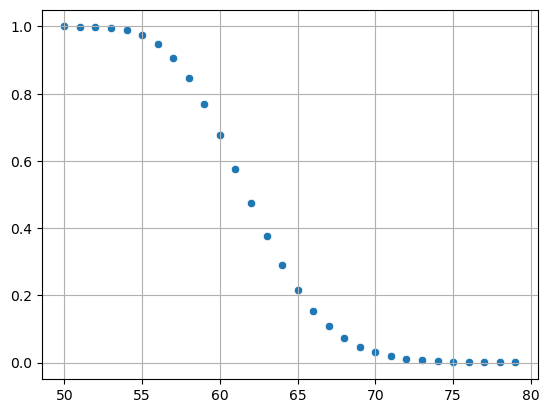

In [17]:
ax = sns.scatterplot(x=k, y=B)
ax.grid(True)

# Erwartungswert und Varianz

# Erwartungswert

* Der Erwartungswert ist derjenige Wert, den man im Mittel beobachten würde, wenn man das Experiment sehr oft wiederholt.

* Bei einer Lotterie ist der Erwartungswert der Betrag, bei dem die Lotterie fair wäre, bei dem also weder der Spieler noch der Betreiber langfristig Geld verdienen würde.




## Spiel 77

| Klasse | Ziffern | Gewinn $$ k $$ | $$P(X=k)$$ | $$ k \cdot P(X=k) $$ |
|--------|---------|----------------|------------|----------------------|
|      I | 7       | 177777.00€     |   0.0000001| 0.018€               |
|     II | 6       |  77777.00€     |   0.0000010| 0.078€               |
|    III | 5       |   7777.00€     |   0.0000100| 0.078€               |
|     IV | 4       |    777.00€     |   0.0001000| 0.078€               |
|      V | 3       |     77.00€     |   0.0010000| 0.077€               |
|     VI | 2       |     17.00€     |   0.0100000| 0.170€               |
|    VII | 1       |      5.00€     |   0.1000000| 0.500€               |
| $\sum$ |         |                |            | 0.998€               |


\begin{equation*}
    E(X) = 0.998\text{€}
\end{equation*}

## Erwartungswert

* $ X $ eine diskrete Zufallsvariable
* Der *Erwartungswert* von $X$ ist
    \begin{equation*}
      E(X) = \sum_k P(X=k) \cdot k
    \end{equation*}
* Die Summe läuft über alle Werte $k$ von $X$

## Beispiel: Würfel

Sei $ X $ die Augenzahl eines fairen Würfels.
  \begin{align*}
    E(X) &= \frac 16 \cdot 1 + \frac 16 \cdot 2 + \frac 16 \cdot 3 +
    \frac 16 \cdot 4 + \frac 16 \cdot 5 + \frac 16 \cdot 6 \\
    &= \frac{21}6 = \frac72 = 3.5
  \end{align*}

Im Mittel zeigt ein fairer Würfel $ 3.5 $ Augen

## Variante des Spiels 77

* Der Einsatz beträgt 2.50€.  Bei welchem Hauptgewinn wäre das Spiel fair?
* Hauptgewinn sei $J$.  Dann
    \begin{align*}
      E(X) &= 0.000\,000\,1 \cdot J + 0.000\,001 \cdot 77\,777 \\
      &\qquad {} + 0.000\,01 \cdot 7\,777 + 0.000\,1 \cdot 777 \\
      &\qquad {} + 0.001 \cdot 77 + 0.01 \cdot 17 + 0.1 \cdot 5 \\
      &= 0.000\,000\,1 \cdot J + 0.980
    \end{align*}
    

* Das soll gleich 2.50 sein.  Also $ 0.000\,000\,1 \cdot J = 1.52 $
    \begin{equation*}
      J = \frac{1.52}{0.000\,000\,1} =  15\,200\,000
    \end{equation*}
* Spiel 77 ist fair bei einem Hauptgewinn von 15.2 Millionen €

## Varianz und Streuung

Die *Varianz* einer Zufallsvariablen $X$ ist definiert als
\begin{equation*}
\text{Var}(X) = \sum_{k=0}^\infty (k-\mu)^2 \cdot P(X=k)
\end{equation*}
wobei $ \mu = E(X) $.

Die *Standardabweichung* oder *Streuung*
von $X$ ist definiert als die Wurzel aus der Varianz
\begin{equation*}
\sigma = \sqrt{\text{Var}(X)}
\end{equation*}

## Gleicher Erwartungswert, unterschiedliche Streuung

<img src="bilder/poissonBar16.svg" alt="zwei Verteilung mit Erwartungswert 16" width="75%"/>

* Links:  Verteilung $X_1$ mit $E(X_1) = 16$ und $\sigma = 4$
* Rechts: Verteilung $X_2$ mit $E(X_2) = 16$ und $\sigma = 1.26$

## Beispiel: Fairer Würfel

* $X$ sei die Augenzahl eines fairen Würfels.  Der Erwartungswert von $X$ ist $\frac 72 = 3.5$
* Varianz der Augenzahlen beim fairen Würfel
        \begin{align*}
            \text{Var}(X) 
            &= \left(1 - \frac72\right)^2 \cdot \frac16 + \left(2 -
            \frac72\right)^2 \cdot \frac16 + \left(3 - \frac72\right)^2
            \cdot \frac16\\
            &\qquad{} + \left(4 - \frac72\right)^2 \cdot \frac16 + \left(5
            - \frac72\right)^2 \cdot \frac16 + \left(6 - \frac72\right)^2
            \cdot \frac16 \\
            &= \frac{35}{12} \\
            &= 2.91667
        \end{align*}

* Streuung
        \begin{equation*}
            \sigma = \sqrt{\frac{35}{12}}
            = 1.7078
        \end{equation*}

## Modell vs. Datensatz

|  Datensatz            | Modell         |
|-----------------------|----------------|
| arithmetisches Mittel | Erwartungswert |
| empirische Varianz    | Varianz        |
| Stichprobenstreuung   | Streuung       |


# Erwartungswert und Varianz der Binomialverteilung


Die Zufallsvariable $X$ sei binomialverteilt gemäß $B_{n,p}$.  Dann
\begin{align*}
E(X) &= n \cdot p \\
\text{Var}(X) &= n \cdot p \cdot (1-p)
\end{align*}

## Rechenregeln

### Rechenregeln für den Erwartungswert

* Für jede Zahl $c$ und jede Zufallsvariable $X$ ist $E(c \cdot X) = c \cdot E(X)$
* ür Zufallsvariablen $X_1, \dots, X_n$ ist $E(X_1 + \dots + X_n) = E(X_1) + \dots + E(X_n)$

### Rechenregeln für die Varianz

* Für jede Zahl $a$ und jede Zufallsvariable $X$ gilt $\text{Var}(a + X) = \text{Var}(X)$
* Für Zahl $c$ und jede Zufallsvariable $X$ gilt $ \text{Var}(c\cdot X) = c^2 \cdot \text{Var}(X)$
* Für jede Zufallsvariable $X$ gilt $\text{Var}(X) = E(X^2) - E(X)^2$

# Unabhängigkeit von Zufallsvariablen

Zwei diskrete Zufallsvariable $X$ und $Y$ sind *stochastisch unabhängig,* wenn für alle möglichen Werte $k$
und $m$
\begin{equation*}
P(X=k, Y=m) = P(X=k) \cdot P(Y=m)
\end{equation*}

Die Unabhängigkeit muss durch die Versuchsplanung gesichert werden

## Zusätzliche Rechenregeln für unabhängige Zufallsvariable

*Produktformel für den Erwartungswert:* $X$ und $Y$ seien **unabhängige** Zufallsvariable.  Dann
\begin{equation*}
E(X \cdot Y) = E(X) \cdot E(Y)
\end{equation*}

*Summenformel* für die Varianz: $X$ und $Y$ seien **unabhängige** Zufallsvariable.  Dann 
\begin{equation*}
  \text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)
\end{equation*}

# Das schwache Gesetz der großen Zahl

## Messwiederholungen

* Warum erhöhen mehrere Messungen die Genauigkeit?
* Warum braucht man 100-mal so viele Messungen, um die Genauigkeit zu verzehnfachen?

### Rechenregeln für den Erwartungswert

* Für jede Zahl $c$ und jede Zufallsvariable $X$ ist $E(c \cdot X) = c \cdot E(X)$
* Für Zufallsvariablen $X_1, \dots, X_n$ ist $E(X_1 + \dots + X_n) = E(X_1) + \dots + E(X_n)$
* $X$ und $Y$ **unabhängige** Zufallsvariable.  Dann
\begin{equation*}
  E(X \cdot Y) = E(X) \cdot E(Y)
\end{equation*}

### Rechenregeln für die Varianz

* Für jede Zahl $a$ und jede Zufallsvariable $X$ gilt $\text{Var}(a + X) = \text{Var}(X)$
* Für Zahl $c$ und jede Zufallsvariable $X$ gilt $\text{Var}(c \cdot X) = c^2 \cdot \text{Var}(X)$
* $X$ und $Y$ **unabhängige** Zufallsvariable.  Dann
\begin{equation*}
  \text{Var}(X + Y) = \text{Var}(X) + \text{\Var}(Y)
\end{equation*}

## Zwei unabhängige, identisch verteilte Zufallsvariable

* $X_1$ und $X_2$ seien unabhängige Zufallsvariable, die derselben Verteilung gehorchen (also z.B. Messwiederholungen).  Sei $Y = \frac12(X_1+X_2)$ der Durchschnittswert.
* Der Erwartungswert von $X_1$ heiße $\mu$, also $E(X_1) = E(X_2) = \mu$ 
* Die Streuung von $X_1$ heiße $\sigma$, also $\text{Var}(X_1) = \text{Var}(X_2) = \sigma^2$

* $E(Y) = \frac12(E(X_1)+E(X_2)) = \mu$
* $\text{Var}(Y) = \left(\frac12\right)^2 \text{Var}(X_1) + \left(\frac12\right)^2 \text{Var}(X_2) = \frac14 \sigma^2 + \frac14
\sigma^2 = \frac12 \sigma^2$
* Also ist $\displaystyle \frac{\sigma}{\sqrt2}$ die Streuung von $Y$

## Das schwache Gesetz der großen Zahl

* "Mit ausreichend vielen Messwiederholungen lässt sich jede Genauigkeit erreichen"
* Präziser: $X_1, \dots, X_n$ unabhängig, alle mit derselben Verteilung 
* $\mu = E(X_1) = \dots = E(X_n)$ und $\sigma^2 = \text{Var}(X_1) = \dots = \text{Var}(X_n)$
* $\displaystyle Y = \frac1n (X_1 + \dots + X_n)$ 
* $Y$ ist das arithmetische Mittel der $X_1, X_2, \dots, X_n$
* Dann $E(Y) = \mu$ und die Streuung von $Y$ beträgt
\begin{equation*}
  \sigma_Y = \frac\sigma{\sqrt n}
\end{equation*}
* Das bedeutet:  Um die Streuung zu zehnteln, müssen 100 mal so viele Versuche durchgeführt werden

##  Beispiel

* ein unbekannter Anteil einer Fischpopulation ist an einem Parasiten erkrankt
* wir wollen diesen Anteil bestimmen, indem wir 10, 40, 1000 bzw. 1000 Fische untersuchen
* Modellierung mittels Zufallszahlengenerator

In [84]:
import pandas as pd
import numpy as np
p = 0.15 # Das weiß die Experimentatorin nicht
P = stats.binom(1, p)

In [114]:
P.rvs(10).sum()

3

In [115]:
P.rvs(40).sum()

5

In [116]:
P.rvs(100).sum()

18

In [117]:
P.rvs(1000).sum()

154

* Große Stichprobenumfänge machen das Ergebnis genauer
* Große Stichprobenumfänge haben oft hohe Kosten
* oder sind ethisch nicht zu rechtfertigen